In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd


In [4]:
cd ..

C:\Users\Fatma\Desktop\Projets\optibrain


In [5]:
from optibrain import SurrogateModeling

C:\Users\Fatma\Desktop\Projets\optibrain\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
path = "C:/Users/Fatma/Downloads/WireModelData/DB_wiremodel24.pickle"

In [41]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
path = "C:/Users/Fatma/Downloads/WireModelData/DB_wiremodel24.pickle"
with open(path, "rb") as f:
    x = pickle.load(f)
X = pd.DataFrame(x['INPUT']['data'])
X.columns = ['tension', 'amplitude', 'deplacement_serrage',
             'deplacement_poids_propre', 'span_length', 'denivele']
y = x['OUTPUT']['data']
# print(len(y))
# print(len(y[0]))
# exit()
outputs = pd.DataFrame(y)
outputs.columns = ["min", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "max"]
list_target = ['min', '40%', '10%', '90%']
list_features = ['tension', 'amplitude', "deplacement_poids_propre"]
y_selected = outputs[list_target]
X = X[list_features]
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y_selected), test_size=.2)

C:\Users\Fatma\AppData\Local\Temp\ipykernel_8968\2857219823.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  x = pickle.load(f)


In [42]:
from optibrain import SurrogateModeling

In [43]:
srgm = SurrogateModeling(['catboost','xgboost','lgbm'], 'regression')

#### Get the best model from the estimator list

In [44]:
srgm.get_best_model(X_train, y_train)

C:\Users\Fatma\Desktop\Projets\optibrain\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [49]:
srgm.get_estimators_performances

catboost    0.915284
lgbm        0.884444
xgboost     0.834014
dtype: float64

In [50]:
srgm.model

MultiOutputRegressor(estimator=<flaml.automl.model.CatBoostEstimator object at 0x0000019D3EF34950>)

In [47]:
y_test


,min,40%,10%,90%
353,7.318532,12.562725,10.726922,16.508723
0,7.727165,14.679533,11.745853,19.049256
341,7.999051,13.524961,11.693348,16.684184
86,8.844433,15.368324,12.491106,20.598020
83,9.927565,16.501046,13.128183,23.879366
...,...,...,...,...
236,9.889298,16.797888,13.943407,20.823012
338,12.078789,18.272326,15.954094,21.779780
335,8.358690,14.915685,11.643238,22.710323
339,11.351671,17.317357,14.216295,26.972903


In [51]:
y_pred

,0,1,2,3
0,7.641074,12.626388,10.868855,16.524253
1,8.060745,14.611837,11.680865,18.830857
2,8.382151,13.477238,11.964607,16.930461
3,8.798443,15.419752,12.524930,20.723474
4,9.842170,16.363262,13.123638,24.035794
...,...,...,...,...
105,10.222854,16.729253,14.177192,21.058858
106,12.379672,18.266690,16.137430,21.841499
107,8.193499,14.968620,11.603714,22.943003
108,10.944339,17.250299,14.053237,26.072458


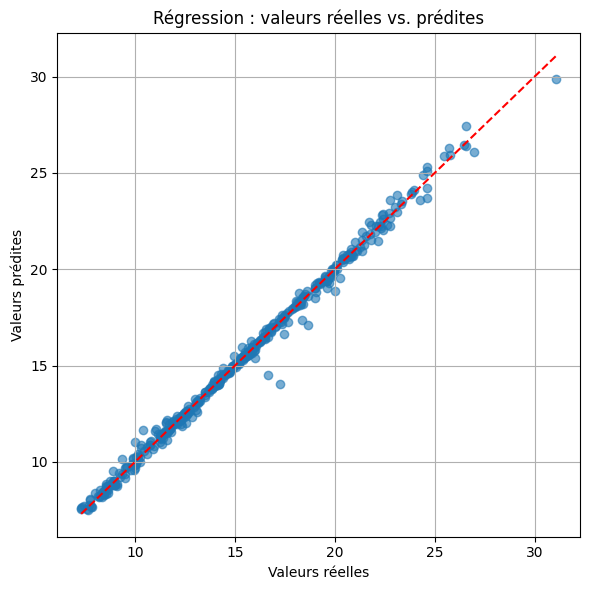

In [48]:
plot_predictions_regression(y_test, y_pred)


### Save the trained selected model

In [71]:
srgm.save("./metamodel_test", "regression_catboost")

Data of the model are saved in ./metamodel_test\regression_catboost.h5.


### Add personnalized estimators

In [54]:
from optibrain.utils.kriging_model import KRGModel
from optibrain.utils.NN_model import FullNeuralNetwork

In [55]:
surrogate_model = SurrogateModeling(['catboost', 'KRG','Neural','lgbm','xgboost'], 'regression')

In [60]:
surrogate_model.get_best_model(X_train, y_train, add_learner = True, learners={"KRG": KRGModel, "Neural":FullNeuralNetwork})

C:\Users\Fatma\Desktop\Projets\optibrain\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 356
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 19.8151958
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 40
   
   Predicting ...
   Predicting - done. Time (sec):  0.0156460
   
   Prediction time/pt. (sec) :  0.0003911
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 356
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   
___________________________________________________________________________
   
                          

In [63]:
surrogate_model.model

MultiOutputRegressor(estimator=KRGModel(task=<flaml.automl.task.generic_task.GenericTask object at 0x0000019D832762A0>))

In [64]:
surrogate_model.get_estimators_performances

KRG         0.963661
catboost    0.915284
lgbm        0.884444
xgboost     0.829077
Neural          -inf
dtype: float64

In [65]:
y_pred = surrogate_model.model.predict(X_test)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0062830
   
   Prediction time/pt. (sec) :  0.0000571
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0055194
   
   Prediction time/pt. (sec) :  0.0000502
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0087395
   
   Prediction time/pt. (sec) :  0.0000794
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 110
   
   Predicting ...
   Predicting - done. Time (sec):  0.0042927
   
   Prediction time/pt. (sec) :  0.0000390
   


In [67]:
y_pred = pd.DataFrame(y_pred)

In [68]:
y_pred

,0,1,2,3
0,7.480661,12.751847,10.790727,16.509043
1,7.937951,14.697020,11.754553,19.082392
2,8.041003,13.113581,11.573630,16.415467
3,8.730158,15.509215,12.474955,20.684887
4,9.883045,16.539815,13.205225,23.936665
...,...,...,...,...
105,10.127792,16.689969,14.067076,20.895434
106,12.607464,18.464512,16.277625,21.714227
107,8.073206,14.881299,11.560472,22.743566
108,10.752540,17.338360,14.200301,25.995344


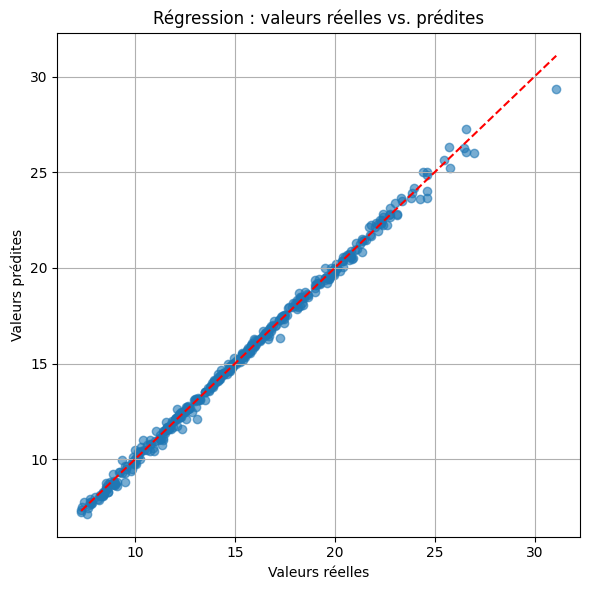

In [69]:
plot_predictions_regression(y_test, y_pred)

### Save the selected trained model

In [72]:
surrogate_model.save('./metamodel_test', 'regression_KRG')

Data of the model are saved in ./metamodel_test\regression_KRG.h5.
